In [26]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
__file__ = './'
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# os.path.dirname(__file__)获取当前文件的绝对路径
# os.path.join(xx,'..')在后面追加..，相当于进入上一级目录
# os.path.abspath(xx)获取绝对路径
# sys.path.append()将其加入系统路径当中

import MSA
import LINK

In [27]:
# read data
my_link = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='link_info')
my_link['I'] = 0
my_node = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='node_info')
my_link['name'] = my_link['from'].astype('str') +'-'+ my_link['to'].astype('str')
my_demand = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='demand_info')
print(my_demand)

  OD_pair  demand
0   r1-s1    5000
1   r1-s2    5000
2   r2-s1    5000
3   r2-s2    5000


In [28]:
# set parameter
origin_zone = ['r1','r2']
destination_zone = ['s1','s2']
theta_1 = 0.008# path 
theta_2 = 0.005 # mode
miu_in = 25
miu_out = 30
lamda_0_hailing = 2 #2 RMB/minute
lamda_0_PR = 20 # RMB
lamda_0_transit = 5
N_hailing = 600
lamda_0_auto = LINK.compute_lamda_0_auto(fuel_consumption=8.5)

0.6517


In [29]:
res = MSA.assignment(my_link= my_link, my_node= my_node, my_demand= my_demand,
                    origin_zone= origin_zone, destination_zone= destination_zone,
                    miu_in= miu_in, miu_out= miu_out,
                    lamda_0_auto = lamda_0_auto,
                    lamda_0_hailing= lamda_0_hailing,
                    lamda_0_transit= lamda_0_transit,
                    lamda_0_PR= lamda_0_PR,
                    theta_1= theta_1, theta_2= theta_2,
                    N_hailing= N_hailing, A=2, maximum_iter=300)

['path-1', 'path-2', 'path-3', 'path-4', 'path-5', 'path-6', 'path-7', 'path-8', 'path-9', 'path-10', 'path-11', 'path-12', 'path-13', 'path-14', 'path-15', 'path-16', 'path-17', 'path-18', 'path-19', 'path-20', 'path-21', 'path-22', 'path-23', 'path-24', 'path-25', 'path-26', 'path-27', 'path-28', 'path-29', 'path-30', 'path-31', 'path-32', 'path-33', 'path-34', 'path-35', 'path-36', 'path-37', 'path-38', 'path-39', 'path-40', 'path-41', 'path-42', 'path-43', 'path-44', 'path-45', 'path-46', 'path-47', 'path-48', 'path-49', 'path-50', 'path-51', 'path-52', 'path-53', 'path-54', 'path-55', 'path-56', 'path-57', 'path-58'] ['auto', 'auto', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'transit', 'transit', 'transit', 'R&T', 'R&T', 'R&T', 'R&T', 'R&T', 'R&T', 'R&T', 'auto', 'auto', 'auto', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'P&R', 'transit', 'transit', 'R&T', 'R&T', 'R&T', 'a

In [30]:
# RMSE
RMSE = res[0]

# idle ride-hailing vehicle number
ride_hailing = res[5]

# market share
mode = res[4]

# path flow
path = res[2]
path = path[['I','path_id', 'mode', 'path_flow', 'path_cost']]
path['path_cost'] = abs(path['path_cost'])

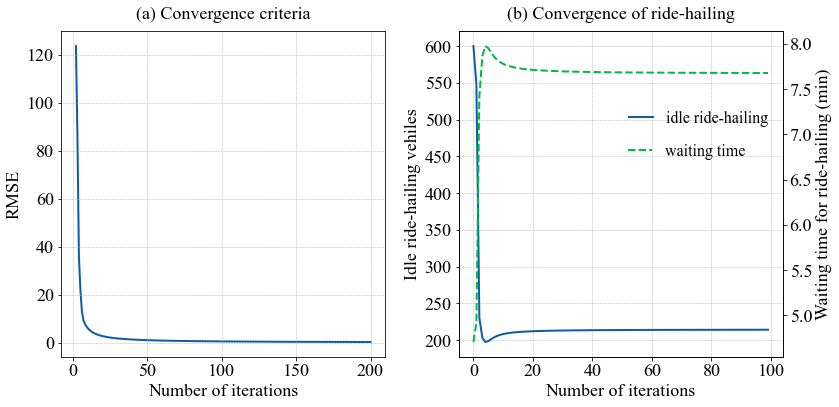

In [31]:
num_loc = 200
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
ax1.grid(ls = '--', lw = 0.5, zorder = 0)
ax1.plot(RMSE['I'].iloc[1:num_loc], RMSE['RMSE'].iloc[1:num_loc], '-', lw = 2, color='#0c5DA5', label='RMSE', markersize=5, zorder =1)
#ax1.set_xticks(np.arange(5, 105, 10))
#ax1.set_xlim(0, 101)
#ax1.set_yticks(np.arange(0, 0.55, 0.05))
#ax1.set_ylim(0, 0.5)
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('RMSE')
ax1.set_title('(a) Convergence criteria', fontsize=18, loc = 'center', y=1.02)

ax2 = plt.subplot(1,2,2)
ax2.grid(ls = '--', lw = 0.5)
ax2.plot(ride_hailing['I'].iloc[:100], ride_hailing['n_idle'].iloc[:100], '-', lw = 2, color='#0c5DA5', label='idle ride-hailing', markersize=5)
ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('Idle ride-hailing vehiles')
# ax2.set_xticks(np.arange(5, 31, 5))
# ax2.set_xlim(0.5, 30.5)
# ax2.set_yticks(np.arange(155,210, 5))
# ax2.set_ylim(150,205)
ax2.set_title('(b) Convergence of ride-hailing', fontsize=18, y= 1.02)

ax3 = plt.twinx(ax2)
ax3.plot(ride_hailing['I'].iloc[:100], ride_hailing['wait_time'].iloc[:100], '--', lw = 2, color='#00B945', label='waiting time', markersize=4)
# ax3.set_yticks(np.arange(3.9, 4.7, 0.1))
# ax3.set_ylim(3.8,4.6)
ax3.set_ylabel('Waiting time for ride-hailing (min)')

ax2.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5, bbox_to_anchor=(1, 0.8))
ax3.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5, bbox_to_anchor=(0.93, 0.7))

plt.tight_layout()

plt.show()

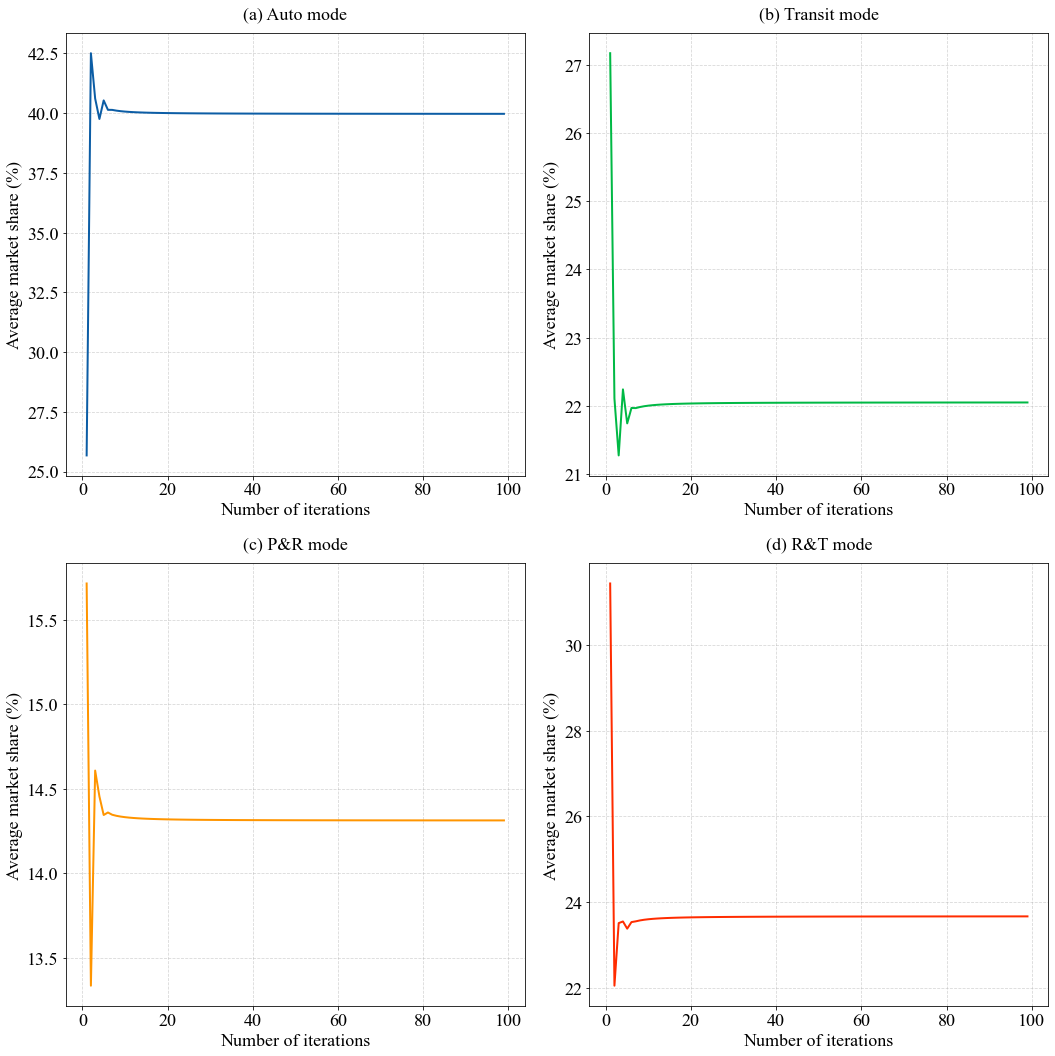

In [32]:
# market share
num_loc = 100
#plt.ticklabel_format(style='plain')

fig,ax = plt.subplots(2,2, figsize=(15,15))
ax = ax.flatten()

ax1 = ax[0]
ax1.ticklabel_format(useOffset=False)
ax1.grid(ls='--', alpha = 0.5)
ax1.plot(mode[mode['mode'] == 'auto'].iloc[1:num_loc]['I'], 
         mode[mode['mode'] == 'auto'].iloc[1:num_loc]['mode_logit']*100, 
         '-', color='#0c5DA5', label='Auto', markersize=5, lw=2)
# ax1.set_xticks(np.arange(0, 205, 20))
# ax1.set_xlim(0.5, 50.5)
# ax1.set_yticks(np.arange(296.8, 298.4, 0.2))
#ax1.set_ylim(36.125,36.127)
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Average market share (%)')
ax1.set_title('(a) Auto mode', fontsize=18, loc='center', y=1.02)

ax2 = ax[1]
ax2.ticklabel_format(useOffset=False)
ax2.grid(ls='--', alpha = 0.5)
ax2.plot(mode[mode['mode'] == 'transit'].iloc[1:num_loc]['I'], 
         mode[mode['mode'] == 'transit'].iloc[1:num_loc]['mode_logit']*100, 
         '-', color='#00b945', label='Transit', markersize=5, lw=2)
# ax1.set_xticks(np.arange(0, 205, 20))
# ax1.set_xlim(0.5, 50.5)
# ax1.set_yticks(np.arange(296.8, 298.4, 0.2))
#ax2.set_ylim(21.2512,21.2518)
ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('Average market share (%)')
ax2.set_title('(b) Transit mode', fontsize=18, loc='center', y=1.02)

ax3 = ax[2]
ax3.ticklabel_format(useOffset=False)
ax3.grid(ls='--', alpha = 0.5)
ax3.plot(mode[mode['mode'] == 'P&R'].iloc[1:num_loc]['I'], 
         mode[mode['mode'] == 'P&R'].iloc[1:num_loc]['mode_logit']*100, 
         '-', color='#ff9500', label='P&R', markersize=5, lw=2)
# ax1.set_xticks(np.arange(0, 205, 20))
# ax1.set_xlim(0.5, 50.5)
# ax1.set_yticks(np.arange(296.8, 298.4, 0.2))
#ax3.set_ylim(19.7795,19.7810)
ax3.set_xlabel('Number of iterations')
ax3.set_ylabel('Average market share (%)')
ax3.set_title('(c) P&R mode', fontsize=18, loc='center', y=1.02)

ax4 = ax[3]
ax4.ticklabel_format(useOffset=False)
ax4.grid(ls='--', alpha = 0.5)
ax4.plot(mode[mode['mode'] == 'R&T'].iloc[1:num_loc]['I'], 
         mode[mode['mode'] == 'R&T'].iloc[1:num_loc]['mode_logit']*100, 
         '-', color='#ff2c00', label='R&T', markersize=5, lw=2)
# ax1.set_xticks(np.arange(0, 205, 20))
# ax1.set_xlim(0.5, 50.5)
# ax1.set_yticks(np.arange(296.8, 298.4, 0.2))
#ax4.set_ylim(22.8405,22.8440)
ax4.set_xlabel('Number of iterations')
ax4.set_ylabel('Average market share (%)')
ax4.set_title('(d) R&T mode', fontsize=18, loc='center', y=1.02)


plt.tight_layout()

plt.show()